In [2]:
!pip install easypaddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.9/308.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 47.0 MB/s eta 0:00:00


In [3]:
!wget  https://global.discourse-cdn.com/uipath/original/3X/b/9/b9afd24d812a6d61769845416f139efcd6042914.jpeg -o image.png


2025-09-29 07:59:17.549 | INFO     | easypaddleocr:__init__:38 - Using device: auto
2025-09-29 07:59:17.549 | WARNING  | easypaddleocr:_download_file:68 - Unspecified det_model, using default value PaddleOCR2Pytorch/ch_ptocr_v4_det_infer.pth
2025-09-29 07:59:17.649 | WARNING  | easypaddleocr:_download_file:68 - Unspecified rec_model, using default value PaddleOCR2Pytorch/ch_ptocr_v4_rec_infer.pth
2025-09-29 07:59:17.752 | WARNING  | easypaddleocr:_download_file:68 - Unspecified cls_model, using default value PaddleOCR2Pytorch/ch_ptocr_mobile_v2.0_cls_infer.pth
2025-09-29 07:59:17.851 | WARNING  | easypaddleocr:_download_file:68 - Unspecified det_model_config, using default value PaddleOCR2Pytorch/configs/det/ch_PP-OCRv4/ch_PP-OCRv4_det_student.yml
2025-09-29 07:59:17.953 | WARNING  | easypaddleocr:_download_file:68 - Unspecified rec_model_config, using default value PaddleOCR2Pytorch/configs/rec/PP-OCRv4/ch_PP-OCRv4_rec.yml
2025-09-29 07:59:18.051 | WARNING  | easypaddleocr:_download_f

Detected Text: Because (Confidence: 0.97)
Bounding Box: [[19.0, 39.0], [601.0, 42.0], [600.0, 291.0], [18.0, 288.0]]


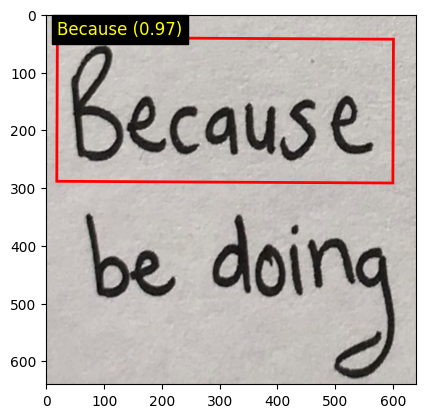

Detected Text: be doing (Confidence: 0.97)
Bounding Box: [[60.0, 337.0], [606.0, 340.0], [605.0, 510.0], [59.0, 507.0]]


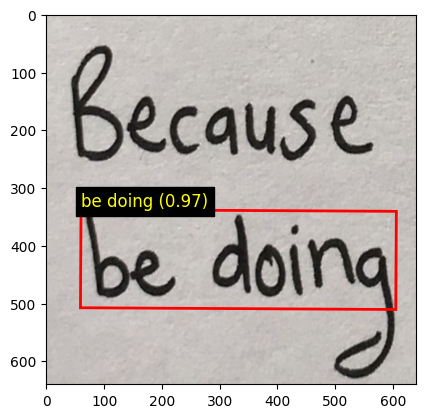

In [25]:
import cv2
from easypaddleocr import EasyPaddleOCR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


image_ndarray = cv2.imread('/content/image.jpeg')
image_ndarray = cv2.resize(image_ndarray,(640,640))
if image_ndarray is None:
    print("Error: Image not loaded. Please check the image path.")
else:
    easyPaddleOCR = EasyPaddleOCR(use_angle_cls=True, needWarmUp=True, lang='en')

    results = easyPaddleOCR.ocr(image_ndarray)

    # Unpack results
    bboxes, texts, timings = results

    # for bbox, (text, confidence) in zip(bboxes, texts):
    #     print(f"Detected Text: {text} (Confidence: {float(confidence):.2f})")
    #     print(f"Bounding Box: {bbox.tolist()}")
    #     plt.imshow(image_ndarray)
    #     plt.show()
    for bbox, (text, confidence) in zip(bboxes, texts):
      print(f"Detected Text: {text} (Confidence: {float(confidence):.2f})")
      print(f"Bounding Box: {bbox.tolist()}")

      # Create figure and axis
      fig, ax = plt.subplots(1)
      ax.imshow(image_ndarray)

      # Convert bbox to a polygon (matplotlib requires [x, y] format)
      polygon = patches.Polygon(bbox, linewidth=2, edgecolor='r', facecolor='none')
      ax.add_patch(polygon)

      # Optionally, add text label at the top-left corner of the bbox
      ax.text(bbox[0][0], bbox[0][1] - 5, f"{text} ({float(confidence):.2f})",
              color='yellow', fontsize=12, backgroundcolor='black')

      plt.show()

